In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Styl wykresów
sns.set_theme(style="darkgrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

df= pd.read_csv("results.csv")
print("Pierwsze 5 wierszy danych z results.csv:")
display(df.head())

# statystyki opisowe
desc = df[["iter", "time"]].describe(percentiles=[0.25, 0.5, 0.75]).T
desc = desc.rename(columns={
    "min": "Min.",
    "25%": "1st Qu.",
    "50%": "Median",
    "mean": "Mean",
    "75%": "3rd Qu.",
    "max": "Max."
})
desc = desc[["Min.", "1st Qu.", "Median", "Mean", "3rd Qu.", "Max."]]
print("Globalne statystyki 'iter' i 'time'")
display(desc.round(3))


Pierwsze 5 wierszy danych z results.csv:


,zad,L,iter,time,evolution
0,1,100,8829,71.213524,4977;5167;5175;5238;5162;5151;5272;5284;5464;5...
1,2,100,5330,42.525657,4866;4982;4917;4970;4870;4845;4757;4824;4880;5...
2,2,100,5848,48.389831,4916;5018;4910;5146;5255;5276;5237;5201;5286;5...
3,2,100,3133,24.962865,4962;4965;4902;5007;4855;4882;4902;5102;5157;5...
4,2,100,19672,159.700825,5048;5135;5227;5365;5446;5418;5423;5490;5482;5...


Globalne statystyki 'iter' i 'time' (results.csv)


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
iter,18.000,1398.000,6401.00,13618.804,16161.500,100000.000
time,0.002,2.925,48.39,317.938,156.594,3128.044


In [ ]:
def parse_evolution(evolution_str):
    return list(map(int, evolution_str.split(";")))


In [ ]:
def plot_single_ribbon(row):
    L = row["L"]
    total_iter = int(row["iter"])
    time_val = row["time"]
    evo = parse_evolution(row["evolution"])
    x_vals = np.arange(1, len(evo) + 1)
    
    # globalne maksimum (cały przebieg)
    max_val = max(evo)
    max_idx = np.argmax(evo) + 1

    # globalne minimum, wykluczając ostatni punkt (konsensus)
    if len(evo) > 1:
        min_val = min(evo[:-1])
        min_idx = np.argmin(evo[:-1]) + 1
    else:
        min_val = evo[0]
        min_idx = 1

    plt.figure()
    plt.fill_between(x_vals, evo, 0, color="mediumseagreen", alpha=0.85, label="Tak")
    plt.fill_between(x_vals, evo, L * L, color="tomato", alpha=0.85, label="Nie")
    plt.plot(x_vals, evo, color="white", linewidth=1.0)
    
    # Punkt startowy
    plt.scatter(x_vals[0], evo[0], color="grey", edgecolors="white", s=80, zorder=5)
    plt.annotate(f"({x_vals[0]}; {evo[0]})", 
                 (x_vals[0], evo[0]), 
                 xytext=(x_vals[0]+200, evo[0]-200),
                 arrowprops=dict(arrowstyle="->", color="white"),
                 color="white")
    
    # Punkt końcowy
    plt.scatter(total_iter, evo[-1], color="grey", edgecolors="white", s=80, zorder=5)
    plt.annotate(f"({total_iter}; {evo[-1]})", 
                 (total_iter, evo[-1]), 
                 xytext=(total_iter-1500, evo[-1]+500),
                 arrowprops=dict(arrowstyle="->", color="white"),
                 color="white")
    
    # Globalne maksimum
    plt.scatter(max_idx, max_val, color="grey", edgecolors="white", s=80, zorder=5)
    plt.annotate(f"({max_idx}; {max_val})", 
                 (max_idx, max_val), 
                 xytext=(max_idx+500, max_val+200),
                 arrowprops=dict(arrowstyle="->", color="white"),
                 color="white")
    
    # Globalne minimum
    plt.scatter(min_idx, min_val, color="grey", edgecolors="white", s=80, zorder=5)
    plt.annotate(f"({min_idx}; {min_val})", 
                 (min_idx, min_val), 
                 xytext=(min_idx+500, min_val+200),
                 arrowprops=dict(arrowstyle="->", color="white"),
                 color="white")
    
    # Linia 50%
    plt.axhline(L * L / 2, color="white", linestyle="--", alpha=0.7)
    
    # Adnotacja
    plt.text(total_iter-200, L * L - 500,
             f"L = {L}\n{total_iter} iteracji\n± {time_val:.2f} s",
             color="white", ha="right", va="top", fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="black", alpha=0.3))
    
    plt.title(f"Ewolucja opinii (zad={row['zad']}), L={L}", color="white")
    plt.xlabel("Iteracja")
    plt.ylabel("Liczba opinii 'tak'")
    plt.xlim(0, total_iter + 1000)
    plt.ylim(0, L * L)
    ax = plt.gca()
    ax.set_facecolor("black")
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_multiple_lines(df_subset, title="Wiele symulacji"):
    data_rows = []
    # Reset numeracji symulacji
    run_ids = range(1, len(df_subset) + 1)
    
    for run_id, (_, row) in zip(run_ids, df_subset.iterrows()):
        evo = parse_evolution(row["evolution"])
        for i, val in enumerate(evo):
            data_rows.append({
                "iter": i,
                "value": val,
                "run": run_id
            })
    long_df = pd.DataFrame(data_rows)
    
    plt.figure()
    sns.lineplot(data=long_df, x="iter", y="value", hue="run", palette="pastel")
    plt.title(title)
    plt.xlabel("Iteracja")
    plt.ylabel("Liczba opinii 'tak'")
    plt.legend(title="Symulacja", loc="best")
    plt.tight_layout()
    plt.show()


Wyświetlam wykres dla Zadania 1 (pojedyncza symulacja, L=100)...


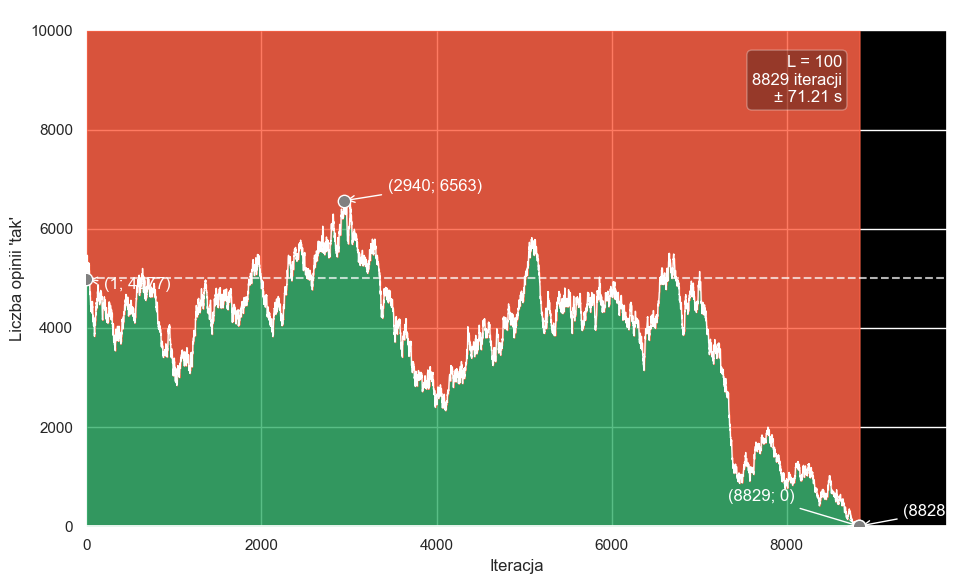

Wyświetlam wykres dla Zadania 2 (10 symulacji, L=100)...


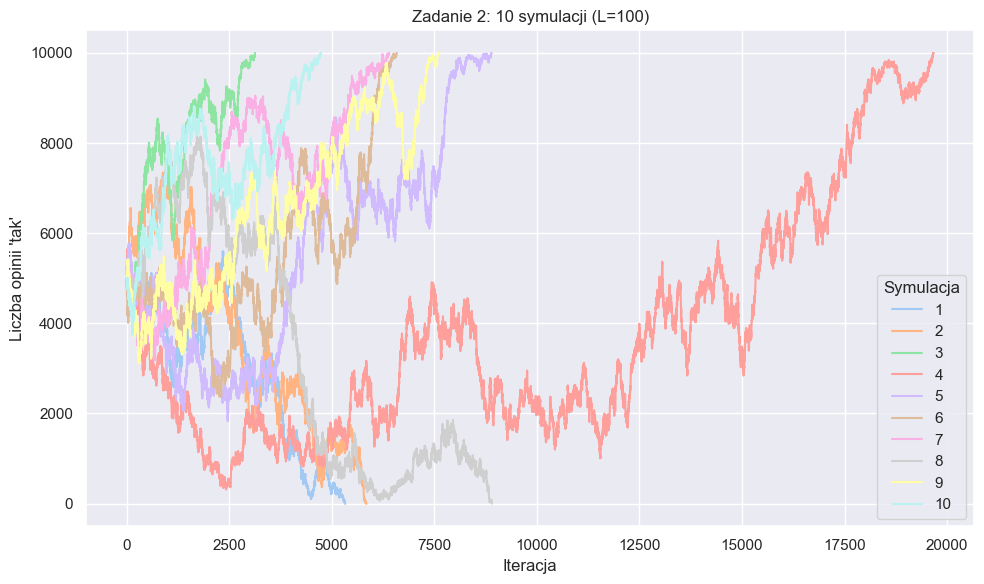

[Zadanie 2] Średni czas (iter) = 7713.70 ± 4567.74
=== Statystyki i wykresy dla Zadania 3 ===

Statystyki opisowe dla L = 10:


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
iter,18.000,31.250,56.000,76.500,104.75,174.000
time,0.002,0.003,0.005,0.007,0.01,0.016


Wyświetlam wykres dla Zadania 3 (10 symulacji, L=10)...


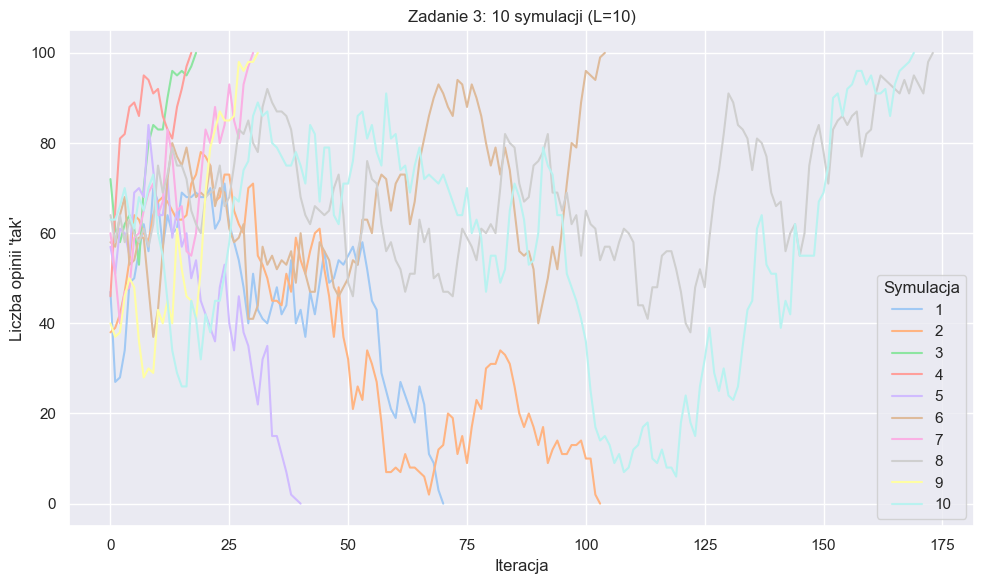

[Zadanie 3, L=10] Średni czas (iter) = 76.50 ± 59.52

Statystyki opisowe dla L = 50:


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
iter,951.000,1368.50,2167.000,2514.800,2826.000,7022.000
time,1.907,2.88,4.538,5.224,5.935,14.597


Wyświetlam wykres dla Zadania 3 (10 symulacji, L=50)...


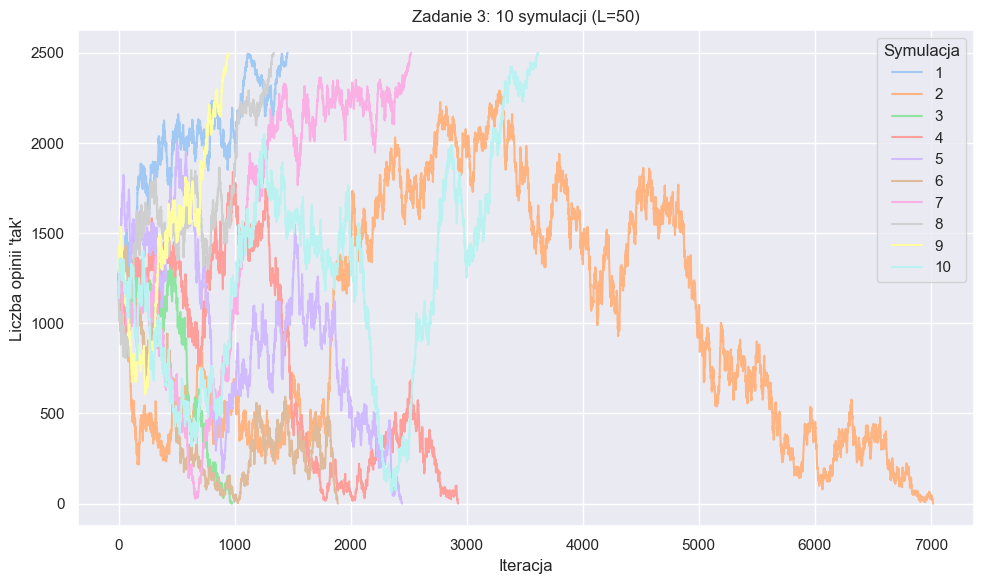

[Zadanie 3, L=50] Średni czas (iter) = 2514.80 ± 1807.18

Statystyki opisowe dla L = 100:


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
iter,3371.000,6572.500,9605.000,12241.600,17874.500,27165.000
time,26.756,53.324,78.547,99.514,144.779,221.665


Wyświetlam wykres dla Zadania 3 (10 symulacji, L=100)...


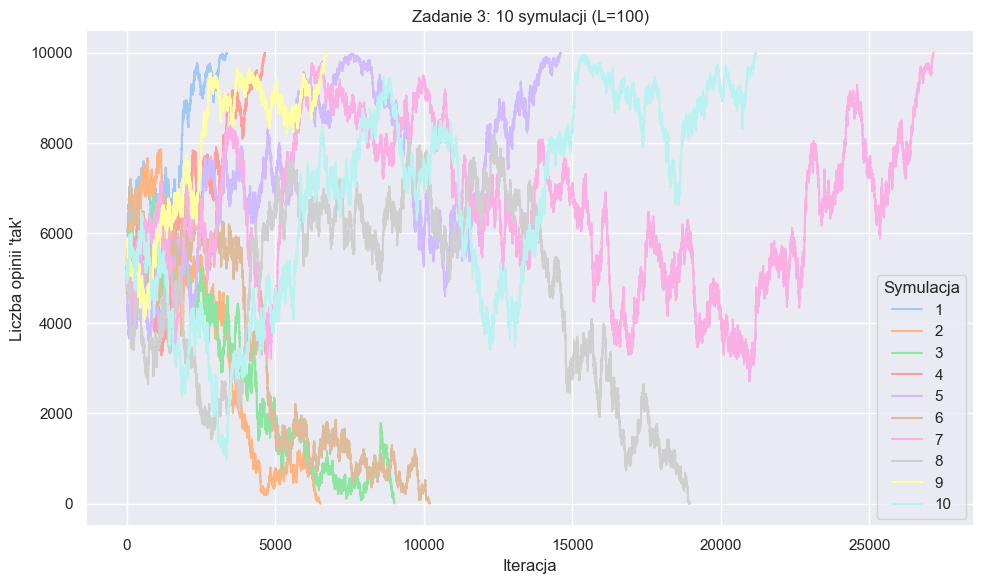

[Zadanie 3, L=100] Średni czas (iter) = 12241.60 ± 7942.64

Statystyki opisowe dla L = 200:


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
iter,9192.000,21708.000,28036.000,46026.400,73379.500,100000.000
time,286.697,689.195,875.899,1447.349,2346.314,3128.044


Wyświetlam wykres dla Zadania 3 (10 symulacji, L=200)...


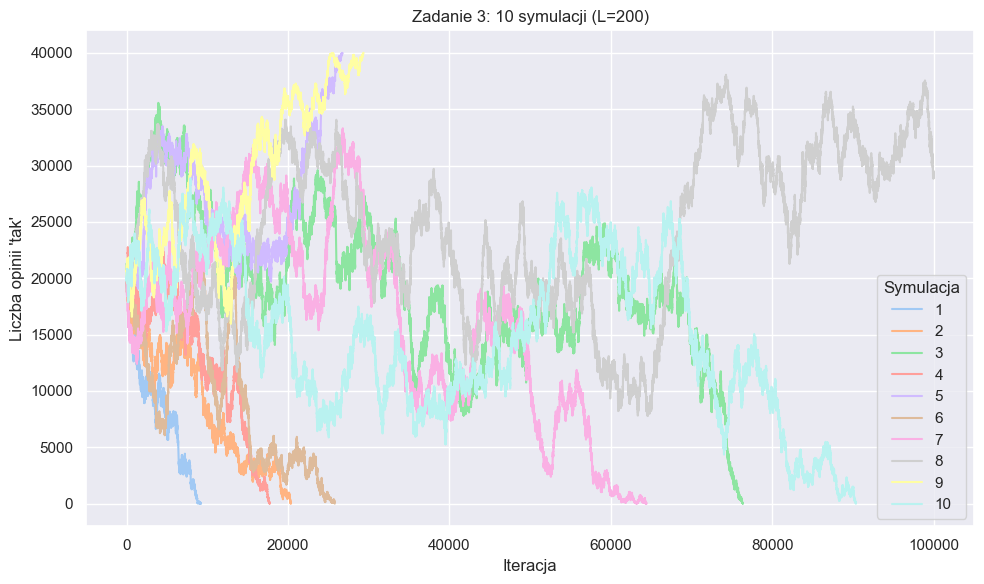

[Zadanie 3, L=200] Średni czas (iter) = 46026.40 ± 33360.82


In [10]:
# Zadanie 1: Pojedyncza symulacja (L=100) – wykres "ribbon"
df_zad1 = df[df["zad"] == 1]
if not df_zad1.empty:
    row_zad1 = df_zad1.iloc[0]
    print("Wyświetlam wykres dla Zadania 1 (pojedyncza symulacja, L=100)...")
    plot_single_ribbon(row_zad1)

# Zadanie 2: 10 symulacji dla L=100 – wykres z wieloma liniami
df_zad2 = df[(df["zad"] == 2) & (df["L"] == 100)]
if not df_zad2.empty:
    print("Wyświetlam wykres dla Zadania 2 (10 symulacji, L=100)...")
    plot_multiple_lines(df_zad2, title="Zadanie 2: 10 symulacji (L=100)")
    mean_iter = df_zad2["iter"].mean()
    std_iter = df_zad2["iter"].std()
    print(f"[Zadanie 2] Średni czas (iter) = {mean_iter:.2f} ± {std_iter:.2f}")

# Zadanie 3: Statystyki i wykresy dla L = 10, 50, 100, 200
print("=== Statystyki i wykresy dla Zadania 3 ===")
for L_val in [10, 50, 100, 200]:
    df_zad3 = df[(df["zad"] == 3) & (df["L"] == L_val)]
    if not df_zad3.empty:
        print(f"\nStatystyki opisowe dla L = {L_val}:")
        summary = df_zad3[["iter", "time"]].describe(percentiles=[0.25, 0.5, 0.75]).T
        summary = summary.rename(columns={
            "min": "Min.",
            "25%": "1st Qu.",
            "50%": "Median",
            "mean": "Mean",
            "75%": "3rd Qu.",
            "max": "Max."
        })
        summary = summary[["Min.", "1st Qu.", "Median", "Mean", "3rd Qu.", "Max."]]
        display(summary.round(3))
        
        print(f"Wyświetlam wykres dla Zadania 3 (10 symulacji, L={L_val})...")
        plot_multiple_lines(df_zad3, title=f"Zadanie 3: 10 symulacji (L={L_val})")
        mean_iter = df_zad3["iter"].mean()
        std_iter = df_zad3["iter"].std()
        print(f"[Zadanie 3, L={L_val}] Średni czas (iter) = {mean_iter:.2f} ± {std_iter:.2f}")

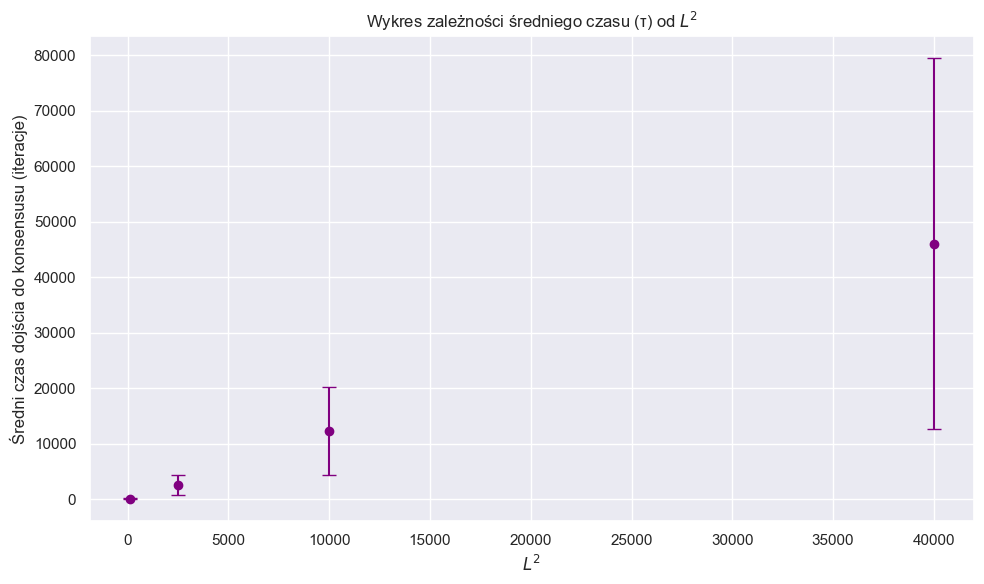

In [11]:
L_values = [10, 50, 100, 200]
avg_iters = []
std_iters = []

for L_val in L_values:
    df_temp = df[(df["zad"] == 3) & (df["L"] == L_val)]
    if not df_temp.empty:
        avg_iters.append(df_temp["iter"].mean())
        std_iters.append(df_temp["iter"].std())

plt.figure()
plt.errorbar([L**2 for L in L_values], avg_iters, yerr=std_iters, fmt="o", capsize=5, color="purple")
plt.xlabel("$L^2$")
plt.ylabel("Średni czas dojścia do konsensusu (iteracje)")
plt.title("Wykres zależności średniego czasu (τ) od $L^2$")
plt.tight_layout()
plt.show()
